Import các package cần thiết

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print('import!')

import!


Đọc file và show 5 row đầu

In [3]:
filepath = 'C:\\Users\\HP\\Downloads\\DA Test - OMRE\\housing_sample_data.csv'
df = pd.read_csv(filepath)
df.head()

,project,property_type,price,area,n_bedrooms,n_bathrooms,balcony_direction,legal,posted_date,post_title,post_description,post_id
0,Times City,Apartment,2650.0,75.0,NaN,NaN,NaN,NaN,2020-11-16 00:00:00 UTC,None,Danh sách căn hộ bán rẻ nhất thị trường hiện t...,27801162
1,Times City,Apartment,2600.0,75.0,2.0,NaN,NaN,NaN,2020-11-12 00:00:00 UTC,None,Danh sách căn hộ bán rẻ nhất thị trường hiện t...,27169471
2,Times City,Apartment,3100.0,83.0,2.0,NaN,NaN,NaN,2020-11-18 00:00:00 UTC,None,"Bán căn 2PN - 83m2 T11 Times city.Giá bán: 3,1...",27841042
3,Times City,Apartment,2850.0,83.0,NaN,NaN,Nam,NaN,2020-11-18 00:00:00 UTC,None,Hiện nay do gia đình không có nhu cầu sử dụng ...,16642988
4,Times City,Apartment,3100.0,83.0,2.0,NaN,NaN,NaN,2020-11-18 00:00:00 UTC,None,"Rẻ chưa từng có căn 2PN Times City, DT 83m2, t...",27839133


## Exploratory data analysis

### 1.Check giá trị null

In [90]:
df.isnull().sum()

project                 0
property_type           0
price                  48
area                   42
n_bedrooms             50
n_bathrooms           470
balcony_direction    1012
legal                1381
posted_date             0
post_title              0
post_description        0
post_id                 0
dtype: int64

Ta có thể thấy 2 trường n_bathrooms , legal và balcony_direction có rất nhiều giá trị null

### 2. Check số bản ghi và bản ghi trùng

In [4]:
#check duplicate
df[df.duplicated()].count()

project              109
property_type        109
price                108
area                 107
n_bedrooms           109
n_bathrooms           94
balcony_direction     72
legal                 64
posted_date          109
post_title           109
post_description     109
post_id              109
dtype: int64

In [5]:
df.drop_duplicates(inplace = True)

In [134]:
#check the numbers of train data and test data
print("The data size: {} ".format(df.shape))

The data size: (2631, 12) 


### 3. Univariate analysis

Ta có thể thấy: các trường project, property_type, n_bedrooms, n_bathrooms, balcony_direction, legal là các trường  thuộc dạng categorical, còn các trường price, area là các trường thuộc dạng continuous. Ta sẽ lần lượt phân tích từng trường này. 
Đầu tiên, ta sẽ sử dụng count plot để xem số lượng các giá trị trong từng trường

#### 3.1. Categorical feature

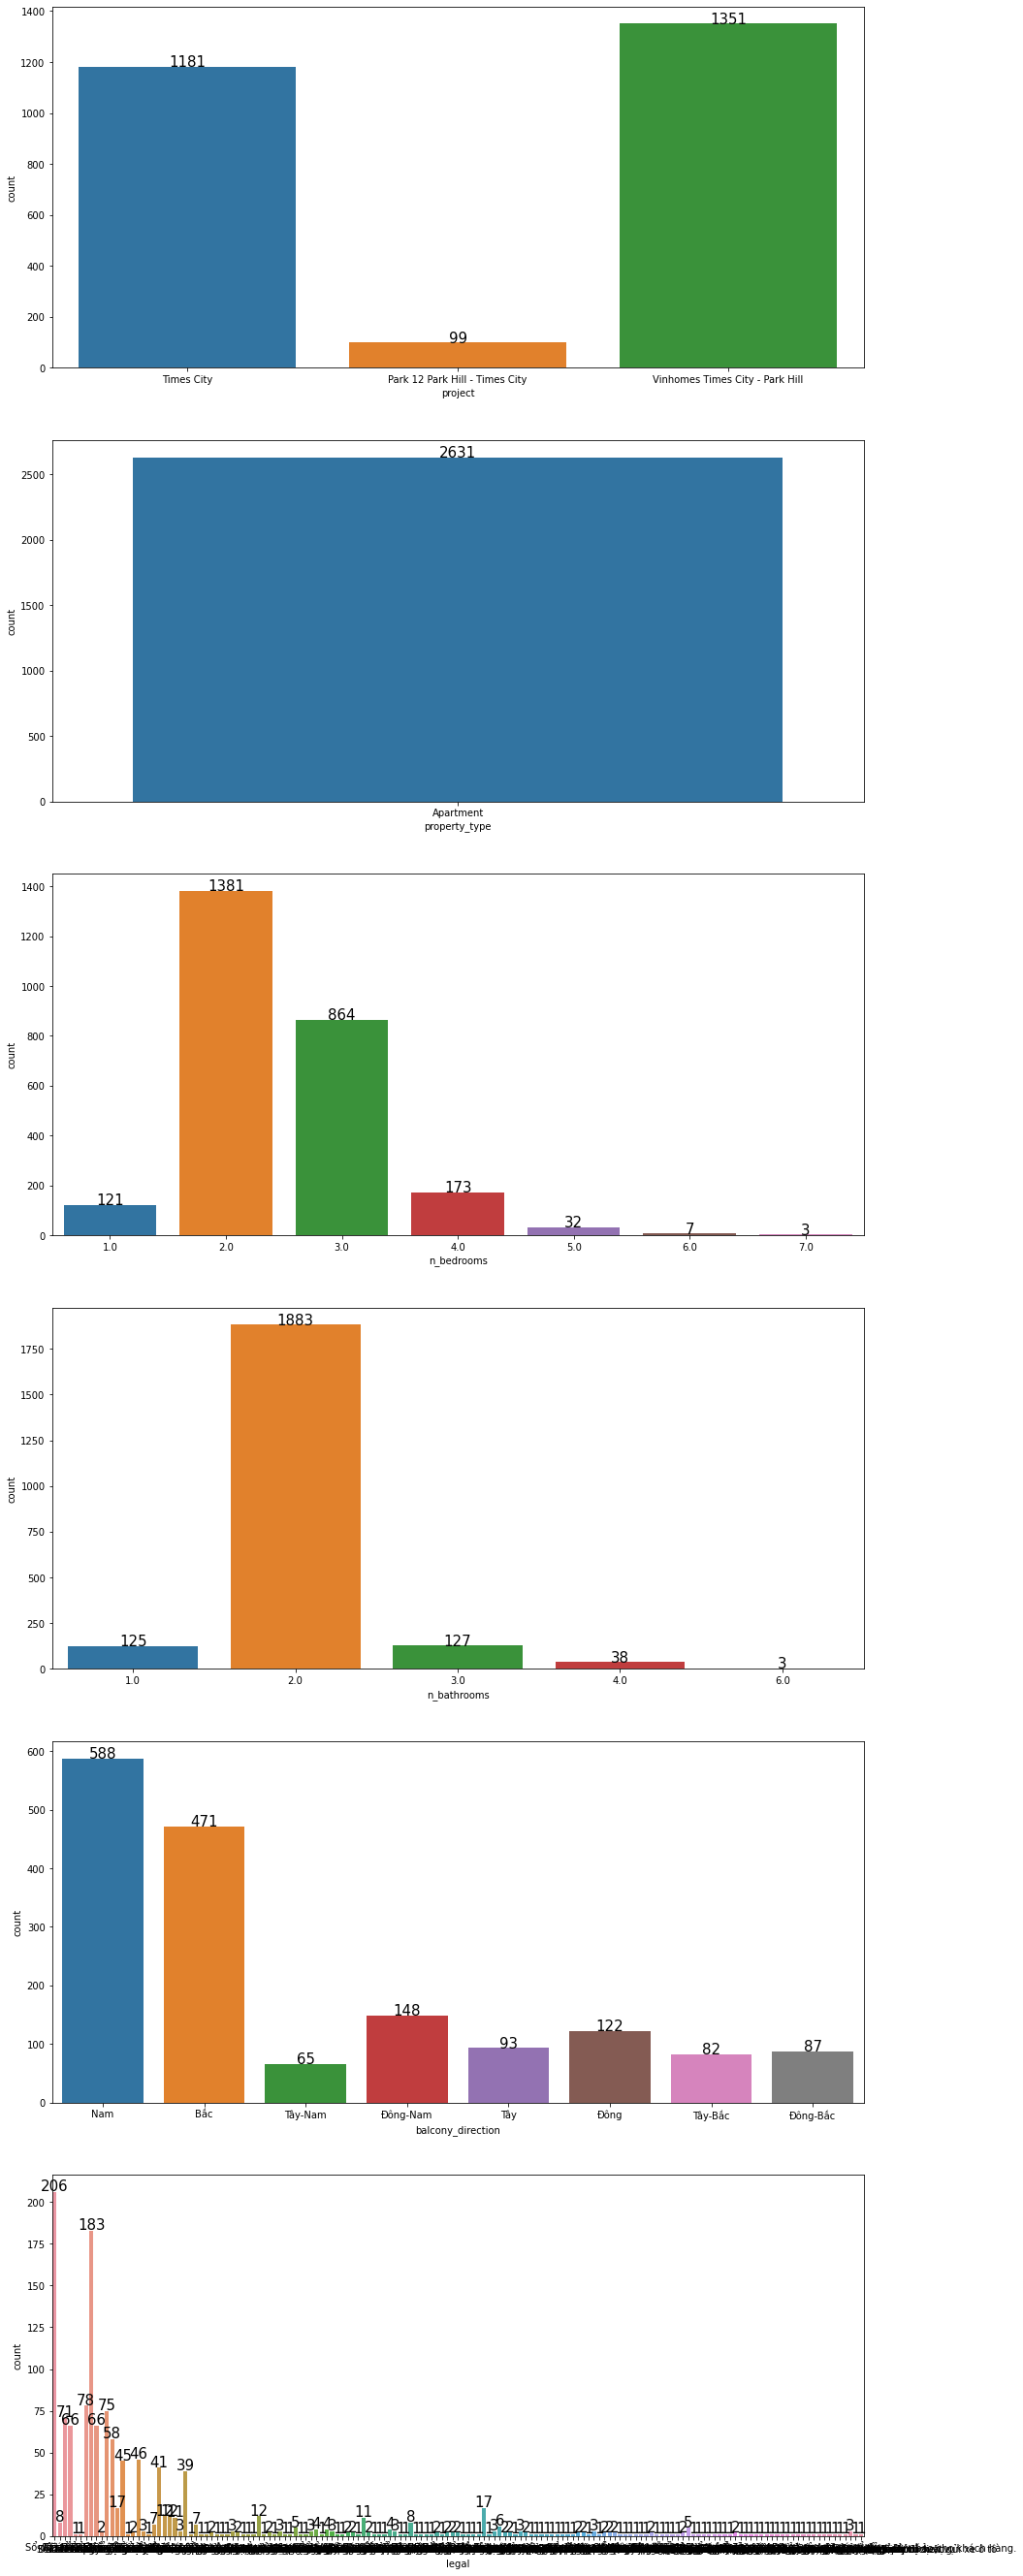

In [94]:
cat_cols = ['project', 'property_type', 'n_bedrooms', 'n_bathrooms', 'balcony_direction', 'legal'] #tập hợp các categorical feature
con_cols = ['price','area'] #tập hợp các trường thuộc dạng continuous.
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, figsize=(15,48))
ax_list= [ax1,ax2,ax3,ax4,ax5,ax6]
#plot
for i, ax in enumerate(ax_list): 
    sns.countplot(ax= ax, data=df, x = cat_cols[i])
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(), horizontalalignment='center', fontsize = 15)
    

Nhận xét: 
1. property_type chỉ có một giá trị duy nhất, vì vậy ta đưa ra kết luận tất cả bản ghi trong dataset đều thuộc dạng apartment và ta không cần thiết phải analysis thêm trường này. 
2. Trường project có 3 loại là Vinhomes Times City - Park Hill, Times City, Park 12 Park Hill - Times City. Đặc biệt ta thấy số liệu thuộc nhóm Park 12 Park Hill - Times City rất ít so với 2 nhóm còn lại, tạo ra hiện tượng imbalanced của dữ liệu. Theo tìm hiểu thì times city có 4 loại khu căn hộ, tòa Vinhomes Times City, tòa Vinhomes Times City Park Hill, tòa Vinhomes Times City - Park Hill Premium và nhà liền kề The Boutique. Park 12 là một tòa thuộc khu Park Hill Premium. Câu hỏi đặt ra ở đây là project Vinhomes Times City - Park Hill có những căn hộ thuộc khu nào ? Dùng excel để xem random một số post description thì ta thấy project này có cả căn hộ Park Hill và căn hộ Park Hill Premium (khoảng 322 bản ghi thuộc tòa Premium theo tính toán bên dưới). Ngoài ra, sử dụng box plot, ta không thấy có nhiều sự khác biệt về giá giữa 2 project  Park 12 Park Hill - Times City và Vinhomes Times City - Park Hill. Vì vậy, ta sẽ gộp project Park 12 Park Hill - Times City vào chung với project Vinhomes Times City - Park Hill để tiện phân tích và tránh hiện tượng imbalanced. 


In [55]:
pd.set_option("display.max_colwidth", None)
#nhìn qua một số post description của project Vinhomes Times City - Park Hill nhưng chứa từ Premium, ta có thể thấy phần lớn 
#bản ghi thỏa mãn tính chất trên đều là bán căn hộ thuộc khu Park Hill Premium, ta có thể dùng excel xem thì sẽ tiện hơn
df[(df['post_description'].str.contains("Premium|premium")) & (df['project'] == 'Vinhomes Times City - Park Hill')].post_description.head()

476    Do chuyển công tác nên gia đình tôi cần bán nhanh căn 2PN đẹp nhất khu Park Hill Premium. Diện tích: 76m2. Thiết kế: 2PN sáng, PK rộng, bếp thông lô gia, 2WC, 2 lô gia. Nội thất theo tiêu chuẩn căn hộ chung cư cao cấp. Giá bán 3,2 tỷ (bao chiếu sáng, loa bluetooth... Thông minh. Căn hộ thuộc tầng vừa phải, view không che chắn. Đặc biệt: Gia đình đã mua gói dịch vụ 10 năm. Có suất để ô tô, 2 xe máy và 2 xe đạp. Giá phí, có gia lộc cho khách về ở may mắn). Liên hệ xem nhà và làm việc SĐT: 0945468222. (Miễn trung gian).
487                                                                                                                                                                                                                                                                                                                                                                                                 Bán nhanh căn 118,5m2 view bể bơi bên tòa Premium.- Thiết kế gồm 3PN sáng thoáng.-

In [56]:
#đếm xem có bao nhiêu bản ghi có tính chất như trên, tuy rằng không chắn chắn 100% post description chưa từ Premium là sẽ bán căn hộ 
#thuộc khu Premium nhưng ta có thể thấy được phần nào số liệu
print('số căn hộ : ',
df[(df['post_description'].str.contains("Premium|premium")) & (df['project'] == 'Vinhomes Times City - Park Hill')].project.count())


số căn hộ :  322


<AxesSubplot:xlabel='project', ylabel='price'>

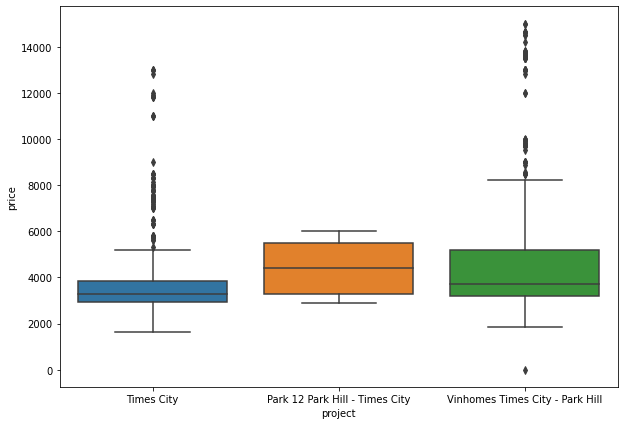

In [95]:
#check box plot 
fig, ax = plt.subplots(figsize = (10,7))
sns.boxplot(ax=ax, x='project', y="price", data=df[['project', 'price']])    


3. Trường n_bedrooms có số lượng bản ghi thuộc loại 2 nhiều nhất, chiếm tới hơn 50%. 
4. Tương tự, n_bathrooms có số lượng bản ghi thuộc loại 2 nhiều nhất, chiếm tới hơn 70%.
5. Trường legal tuy thuộc dạng categorical nhưng lại có quá nhiều distinct value, vì vậy ta sẽ phân tích sâu hơn về trường này.

In [3]:
df['legal'].value_counts()

Có sổ                                                                 213
Đã có sổ đỏ.                                                          188
Sổ đỏ.                                                                 79
Sổ đỏ                                                                  75
Sổ đỏ chính chủ.                                                       75
                                                                     ... 
Thủ tục pháp lý sang tên căn hộ nhanh gọn, đảm bảo cho khách hàng.      1
Pháp lý: Căn hộ đã có sổ đỏ chính chủ.                                  1
Đã có sổ hồng sử dụng lâu dài.                                          1
Có sổ đỏ, sổ đỏ không vay                                               1
Đã có sổ, sổ không vay ngân hàng                                        1
Name: legal, Length: 155, dtype: int64

Tuy trường legal có 155 giá trị nhưng trong số đó lại có nhiều giá trị bị trùng lặp về ý nghĩa, vì 155 cũng không nhiều nên em đã đọc hết các các giá trị này phát hiện ra trường này chứa 3 nhóm : có sổ đỏ/sổ hồng, thế chấp, unknown. 

#### 3.2. Continuous feature

**Visualize trường price**

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

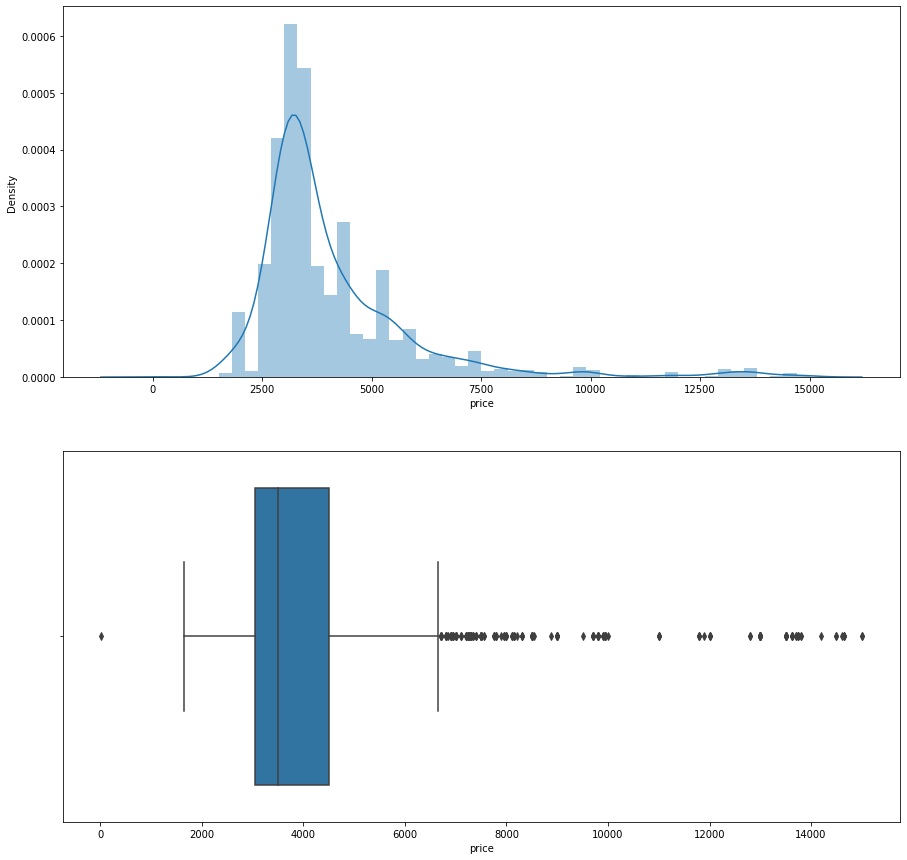

In [96]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,15))
sns.distplot( df['price'], ax = ax1)
sns.boxplot(ax=ax2,  x=df[ 'price'])    

In [97]:
df['price'].describe()

count     2584.000000
mean      4116.652670
std       1908.639487
min          8.500000
25%       3050.000000
50%       3500.000000
75%       4500.000000
max      15000.000000
Name: price, dtype: float64

Nhận xét về trường price: 
1. Có thể đưa về normal distribution, có positive skewness.
2. Có mean = 4,1 tỷ và median = 3,48 tỷ 
3. Có nhiều outliers có giá lớn, tuy nhiên có thể hợp lý vì thực tế có một số căn nhà đặc biệt sẽ rất đắt so với mức giá chung
4. Có outliers giá trị bằng 8.5, sau khi check thì thấy đây là bản ghi về giá thuê nhà, không phù hợp với dataset giá bán nhà của chúng ta => cần drop giá trị này

**Visualize trường price**

In [98]:
df['area'].describe()

count    2591.000000
mean      100.736978
std        33.826658
min        50.000000
25%        80.000000
50%        95.000000
75%       115.000000
max       308.000000
Name: area, dtype: float64

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area'>

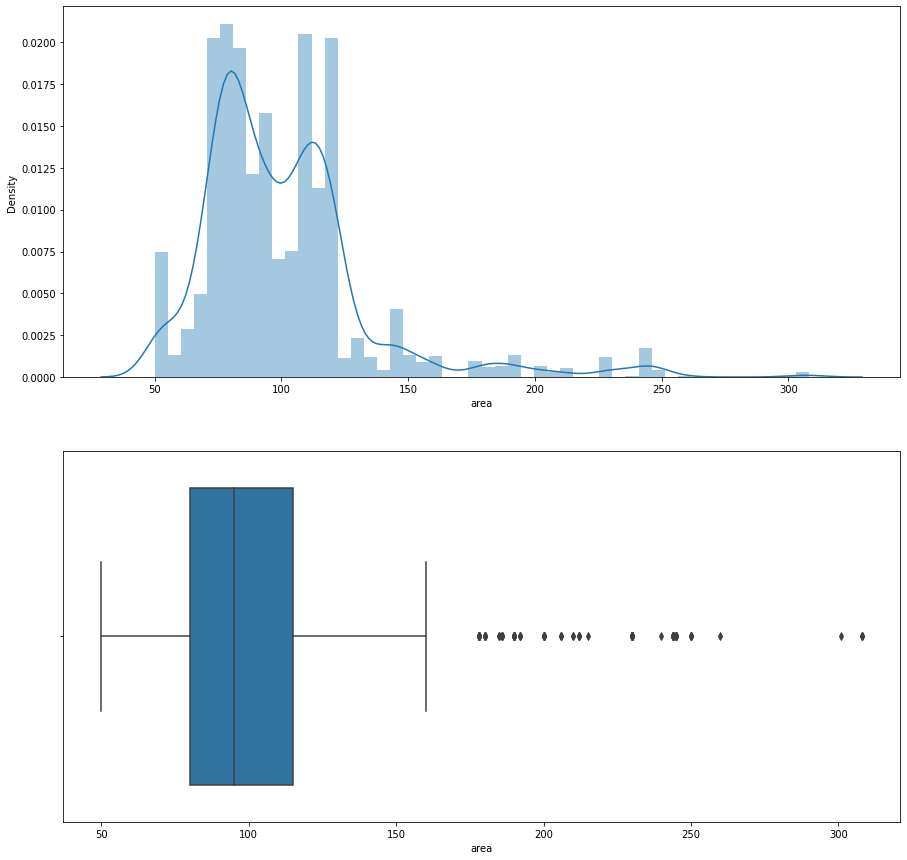

In [99]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,15))
sns.distplot( df['area'], ax = ax1)
sns.boxplot(ax=ax2,  x=df[ 'area'])   

Nhận xét về trường area: 
Có outliers , tuy nhiên có thể hợp lý vì thực tế có một số căn nhà đặc biệt sẽ rất rộng như căn đập thông 

### 3.2. bivariate analysis

**Xem mối quan hệ giữa area và price**

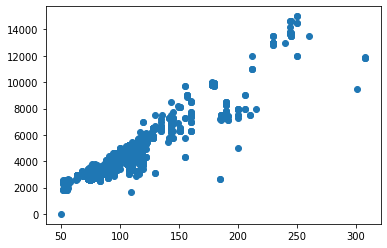

In [100]:
fig, ax = plt.subplots()
#scatter plot 
ax.scatter(x = df['area'], y = df['price'])

In [9]:
df[['price','area']].corr()

,price,area
price,1.000000,0.928193
area,0.928193,1.000000


Nhận xét: 
1. ta có thể thấy 2 biến này có mối quan hệ đồng biến với correlation = 0.93, phù hợp với mối quan hệ giữa giá nhà và diện tích
2. Ta có thể thấy một vài outlier, trong đó có outlier giá nhà rất thấp là do sai sót mà ta phân tích phía trên, các outlier còn lại ta sẽ thử select xem các outlier này là bản ghi như thế nào.

In [101]:
pd.set_option("display.max_colwidth", None)
df[((df['area']>100) & (df['price'] < 2000))|((df['area']>175) & (df['price'] < 3000))].head()

,project,property_type,price,area,n_bedrooms,n_bathrooms,balcony_direction,legal,posted_date,post_title,post_description,post_id
1442,Vinhomes Times City - Park Hill,Apartment,2650.0,185.0,2.0,NaN,NaN,NaN,2020-12-24 00:00:00 UTC,"Chuyển nhượng căn 2 ngủ sáng Park Hill - tầng trung - ban công Nam - 2,65 tỷ","Gia đình em có nhu cầu chuyển nhượng căn 2 ngủ sáng Park Hill.Căn hộ tầng trung, ban công Nam mát mẻ, View thoáng đẹp không bị che chắn tầm nhìn.Nhà đang để ở nên giữ gìn mới đến 99%.Sổ đỏ chính chủ không vay ngân hàng, sang tên nhanh gọn.Liên hệ 0931351919 xem căn hộ trực tiếp.Truy cập Website: https://www.timecityparkhill.com để biết thêm thông tin chi tiết.",28300175
2168,Vinhomes Times City - Park Hill,Apartment,2650.0,185.0,2.0,NaN,NaN,NaN,2020-12-24 00:00:00 UTC,"Chuyển nhượng căn 2 ngủ sáng Park Hill - tầng trung - ban công Nam - 2,65 tỷ","Gia đình em có nhu cầu chuyển nhượng căn 2 ngủ sáng Park Hill.Căn hộ tầng trung, ban công Nam mát mẻ, View thoáng đẹp không bị che chắn tầm nhìn.Nhà đang để ở nên giữ gìn mới đến 99%.Sổ đỏ chính chủ không vay ngân hàng, sang tên nhanh gọn.Liên hệ 0931351919 xem căn hộ trực tiếp.Truy cập Website:https://www.timecityparkhill.com để biết thêm thông tin chi tiết",28300175
2526,Times City,Apartment,1650.0,109.5,2.0,2.0,Nam,Đã có sổ đỏ.,2020-12-21 00:00:00 UTC,"Bán căn 2 phòng ngủ siêu rộng, siêu rẻ 109.5m2, giá chỉ 3.65 tỷ bao phí, hướng Nam tại tImes City","Bán căn 2 phòng ngủ siêu rộng, siêu rẻ 109.5m2, giá chỉ 3.65 tỷ bao phí, hướng Nam tại Vinhomes Times City.Thông tin chi tiết:- Nhà mới tinh.- Căn hộ rẻ vô đối thủ do chủ nhà cần tiền kinh doanh.- Có ảnh thực tế đi kèm.- Diện tích và thiết kế: 109.5m2; thiết kế 2 phòng ngủ, 2 nhà vệ sinh.- Hướng: Ban công Nam thoáng mát.- Nội thất: Hệ thống đèn chiếu sáng sang trọng, điều hòa, sàn gỗ, tủ âm tường, bếp, tủ bếp và các thiết bị vệ sinh cao cấp...- Giá bán: 3.65 tỷ bao toàn bộ phí, thuế.- Pháp lý: Căn hộ đã có sổ đỏ chính chủ.Xem nhà liên hệ: 0898.899.869.",28257968


Ta có thể thấy các bản ghi trên đang bị sai so với phần description.

**Xem mối quan hệ giữa area và n_bedrooms**

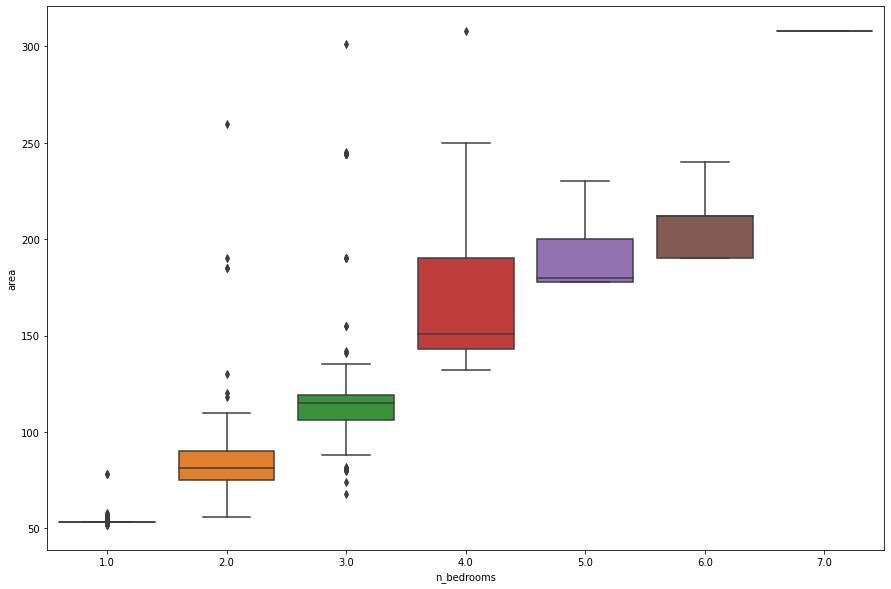

In [105]:
fig, ax = plt.subplots(figsize=(15,10))
r = sns.boxplot(ax=ax, x='n_bedrooms', y="area", data=df[['n_bedrooms', 'area']])    

Ta có thể thấy có một số phòng 1,2,3 phòng ngủ có diện tích cao một cách bất thường, sau khi kiểm tra thì thấy đây là do hiện tượng sai dữ liệu

**Xem mối quan hệ giữa bedrooms và price**

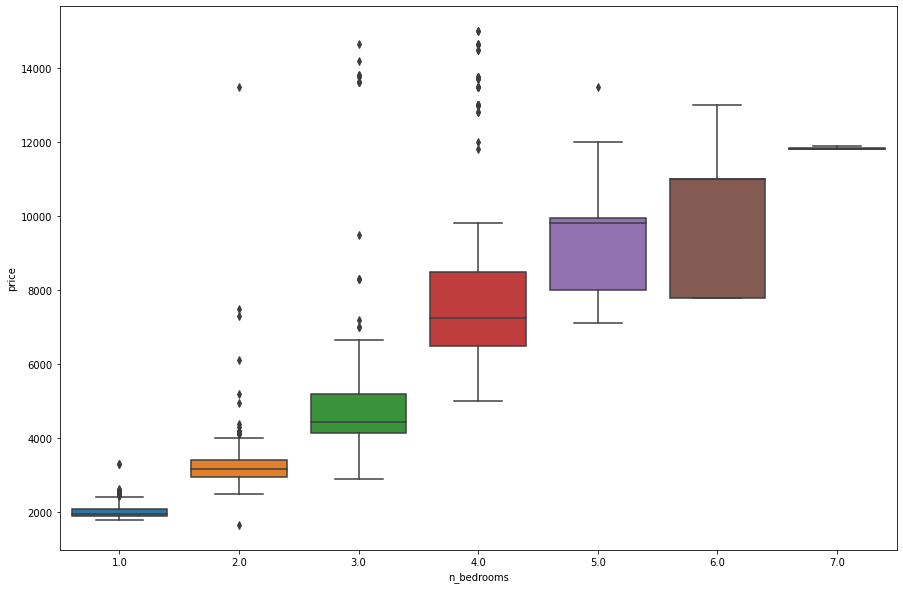

In [107]:
fig, ax = plt.subplots(figsize=(15,10))
r = sns.boxplot(ax=ax, x='n_bedrooms', y="price", data=df[['n_bedrooms', 'price']])    

**Xem mối quan hệ giữa balcony_direction và price**

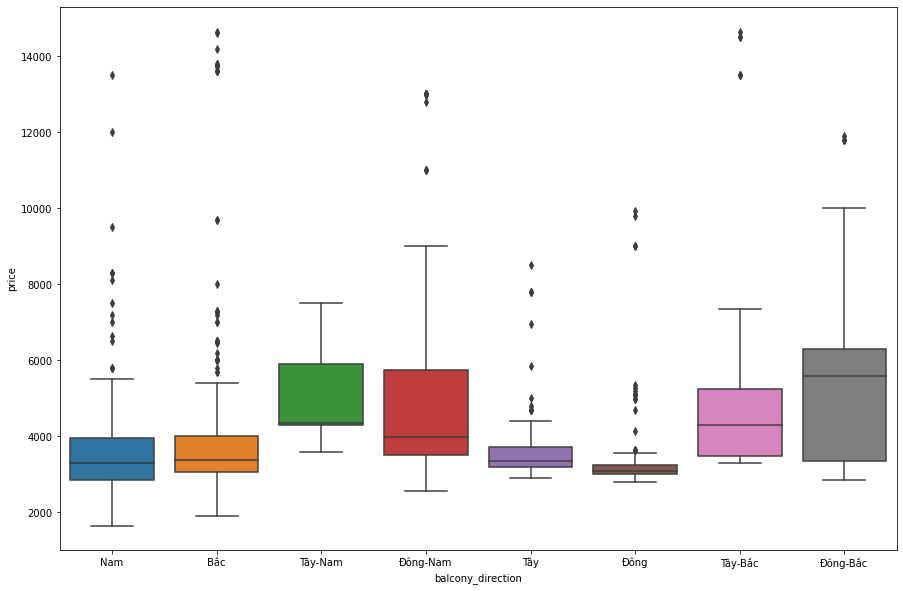

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
r = sns.boxplot(ax=ax, x='balcony_direction', y="price", data=df[['balcony_direction', 'price']])    

**Xem mối quan hệ giữa n_bedrooms và price**

<AxesSubplot:xlabel='n_bedrooms', ylabel='price'>

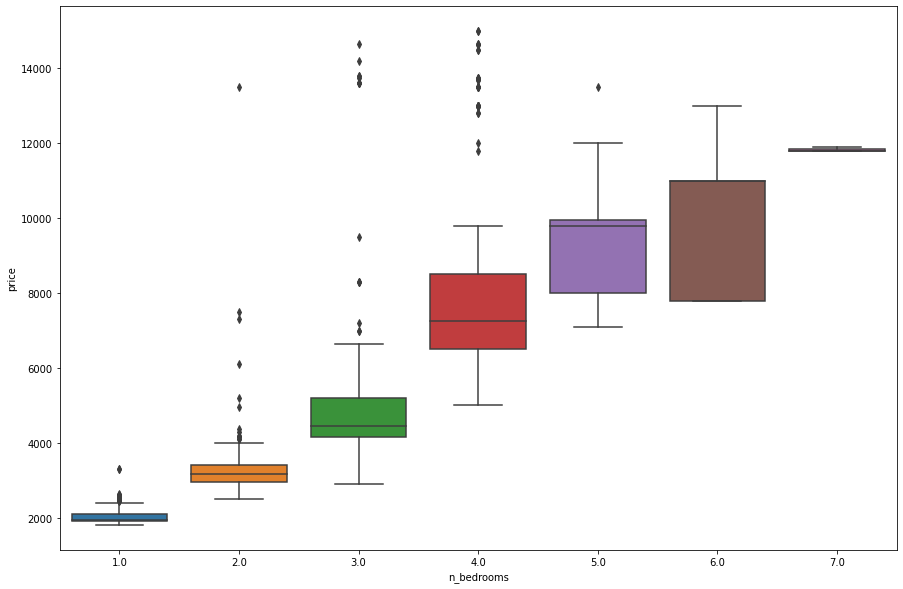

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(ax=ax, x='n_bedrooms', y="price", data=df[['n_bedrooms', 'price']])    

Ta có thể thấy số phòng ngủ càn nhiều thì giá nhà càng cao, điều này hợp lý với thực tế

## Data pre-preparation

#### 1. Xóa giá trị không phù hợp

In [10]:
df.drop(df[df['price'] == 8.5].index, inplace = True) #xóa giá trị nhà cho thuê

Còn một số lỗi sai dữ liệu mà em có đã chỉ ra ở phía trên, các lỗi đó có thể sửa được nhờ phần description, tuy nhiên quá trình sửa lại dữ liệu khá là mất thời gian và số lượng bản ghi mà em phát hiện ra bị sai cũng không nhiều nên em sẽ xóa các bản ghi này.

In [11]:
df.drop(df[((df['area']>100) & (df['price'] < 2000))|((df['area']>175) & (df['price'] < 3000))].index, inplace = True)

#### 2. Ta sẽ thực hiện transfrom trường legal về 3 nhóm có sổ đỏ/sổ hồng, thế chấp, unknown.

In [137]:
df['legal'] = df['legal'].fillna('unknown') #fill na bằng unknown
# def hàm để chuyển tiếng việt có dấu sang không dấu => tiện cho việc transform
import unidecode
def remove_accent(row):
    return unidecode.unidecode(row.legal)
df['legal'] = df.apply(remove_accent, axis='columns' )

In [138]:
#def hàm trans để transform dữ liệu
def trans(row):
    if 'co so' in row.legal.lower() or 'khong the chap' in row.legal.lower() or 'so do chinh chu' in row.legal.lower():
        return 'có sổ đỏ/sổ hồng'
    if 'the chap' in row.legal.lower():
        return 'thế chấp'
    else:
        return row.legal.lower()
#xem trường legal sau khi apply hàm trans
df.apply(trans, axis='columns' ).value_counts()
    

unknown                                                                                          1333
có sổ đỏ/sổ hồng                                                                                 1081
so do.                                                                                             78
so do                                                                                              75
so hong                                                                                            18
so do cam tay                                                                                       8
thế chấp                                                                                            5
so do cam tay, bao thue phi sang ten.                                                               3
so do vuong van                                                                                     3
so do khong vay                                                                   

In [139]:
#Ta thấy còn một số giá trị như trên, ta tiếp tục bổ sung vào hàm trans các điều kiện
def trans(row):
    if 'co so' in row.legal.lower() or 'khong the chap' in row.legal.lower() or 'so do chinh chu' in row.legal.lower() or 'so do' in row.legal.lower() or 'o so' in row.legal.lower() or 'so hong' in row.legal.lower() or 'sdcc' in row.legal.lower() or 'so cam tay' in row.legal.lower():
        return 'có sổ đỏ/sổ hồng'
    if 'the chap' in row.legal.lower():
        return 'thế chấp'
    else:
        return 'unknown'
#xem trường legal sau khi apply hàm trans
df.apply(trans, axis='columns' ).value_counts()

unknown             1338
có sổ đỏ/sổ hồng    1284
thế chấp               5
dtype: int64

Sau khi check hàm đã ok, ta transform trường legal

In [140]:
df['legal'] = df.apply(trans, axis='columns' )

### 3. Thực hiện transform trường project : replace các giá trị Park 12 Park Hill - Times City bằng giá trị Vinhomes Times City - Park Hill 

In [12]:
df['project'].replace('Park 12 Park Hill - Times City', 'Vinhomes Times City - Park Hill', inplace = True)

### 4. Thực hiện transform trường n_bedrooms và n_bathrooms : 
dựa vào hiểu biết và phân bổ của các giá trị ở phần visualize phía trên, ta sẽ cắt lớp 2 trường này như sau: 
1. trường n_bedrooms : đưa về các giá trị 1 , 2, 3, và >= 4
2. trường n_bathrooms : đưa về các giá trị 1 , 2, >=3


In [142]:
#trường n_bedrooms :
df['n_bedrooms'] = df['n_bedrooms'].fillna('unknown') #fill na bằng unknown
def trans_bed(row):
    if row.n_bedrooms == 'unknown':
        return 'unknown'
    if int(row. n_bedrooms) >= 4:
        return '>=4'
    else:
        return str(int(row. n_bedrooms))
df['n_bedrooms'] = df.apply(trans_bed, axis='columns' )
#trường n_bathrooms :
df['n_bathrooms'] = df['n_bathrooms'].fillna('unknown') #fill na bằng unknown
def trans_bath(row):
    if row.n_bathrooms == 'unknown':
        return 'unknown'
    if int(row.n_bathrooms) >= 4:
        return '>=3'
    else:
        return str(int(row.n_bathrooms))
df['n_bathrooms'] = df.apply(trans_bath, axis='columns' )

### 5. Thực hiện add thêm trường cắt lớp area, price

dựa vào hiểu biết và phân bổ của các giá trị ở phần visualize phía trên, ta sẽ cắt lớp 2 trường này như sau:
trường price : fill null bằng giá trị thương lượng, cắt lớp thành các khoảng : 1-2 tỷ, 2-3 tỷ, 3-4,5 tỷ, 4,5-7,5 tỷ, 7,5-10 tỷ, >10 tỷ
trường area : fill null bằng giá trị unknown, cắt lớp thành các khoảng : 50-80 m2, 80-100 m2, 100-150 m2, 150-250 m2, >250 m2

In [143]:
#trường price
df['price_cl'] = df['price'].fillna('thương lượng') #fill na bằng thương lượng
def trans_price(row):
    if row.price_cl == 'thương lượng':
        return 'thương lượng'
    if int(row.price_cl) >= 10000:
        return '>=10'
    if int(row.price_cl) >= 7500:
        return '7.5-10'
    if int(row.price_cl) >= 4500:
        return '4.5-7.5'
    if int(row.price_cl) >= 3000:
        return '3-4.5'
    if int(row.price_cl) >= 2000:
        return '2-3'
    if int(row.price_cl) >= 1000:
        return '1-2'  
    else:
        return '<1'
df['price_cl'] = df.apply(trans_price, axis='columns' )

In [146]:
#trường area :
df['area_cl'] = df['area'].fillna('unknown') #fill na bằng unknown
def trans_area(row):
    if row.area_cl == 'unknown':
        return 'unknown'
    if int(row.area_cl) >= 250:
        return '>=250'
    if int(row.area_cl) >= 150:
        return '150-250'
    if int(row.area_cl) >= 100:
        return '100-150'
    if int(row.area_cl) >= 80:
        return '80-100'
    if int(row.area_cl) >= 50:
        return '50-80'
df['area_cl'] = df.apply(trans_area, axis='columns' )

#### 5. fill null trường balcony_direction

In [147]:
df['balcony_direction'] = df['balcony_direction'].fillna('unknown') #fill na bằng unknown

In [151]:
df.head() #df sau khi transform

,project,property_type,price,area,n_bedrooms,n_bathrooms,balcony_direction,legal,posted_date,post_title,post_description,post_id,Cl Gia,area_cl
0,Times City,Apartment,2650.0,75.0,unknown,unknown,unknown,unknown,2020-11-16 00:00:00 UTC,None,Danh sách căn hộ bán rẻ nhất thị trường hiện tại ở Times City. Hotline: 0976...,27801162,2-3,50-80
1,Times City,Apartment,2600.0,75.0,2,unknown,unknown,unknown,2020-11-12 00:00:00 UTC,None,Danh sách căn hộ bán rẻ nhất thị trường hiện tại ở Times City. Hotline: 0941...,27169471,2-3,50-80
2,Times City,Apartment,3100.0,83.0,2,unknown,unknown,unknown,2020-11-18 00:00:00 UTC,None,"Bán căn 2PN - 83m2 T11 Times city.Giá bán: 3,1 tỷ (bao phí).- Diện tích: 83m...",27841042,3-4.5,80-100
3,Times City,Apartment,2850.0,83.0,unknown,unknown,Nam,unknown,2020-11-18 00:00:00 UTC,None,Hiện nay do gia đình không có nhu cầu sử dụng căn hộ cao cấp tại Times City ...,16642988,2-3,80-100
4,Times City,Apartment,3100.0,83.0,2,unknown,unknown,unknown,2020-11-18 00:00:00 UTC,None,"Rẻ chưa từng có căn 2PN Times City, DT 83m2, toà T11, tầng trung, giá cắt lỗ...",27839133,3-4.5,80-100


In [150]:
df.rename(columns={"price_cl": "Cl Gia"}, inplace=True)

**Lưu lại df đã chuẩn bị**

In [152]:
df.to_csv('prepared_csv.csv')

## 3. Hypothesis testing

Ngoài trường 2 trường diện tích, số phòng ngủ mà ta có thể thấy rõ ràng mối quan hệ với giá nhà, ta sẽ kiểm định mối quan hệ giữa giá nhà và 2 trường project, balcony direction

### Assumption1 : liệu giá nhà của nhóm park hill có cao hơn giá nhà của nhóm times city.

Sử dụng kiểm định t test two sample unpaired (Welch’s t-test)

Chọn mức ý nghĩa anpha = 0.05 

Giả thuyết H0: mean park hill = mean times city

Giả thuyết H1: mean park hill > mean times city

In [28]:
df1 = df[['price','project']].dropna()
from scipy import stats as st
b = df1.loc[df1['project'] == 'Times City', 'price'].to_numpy()
a = df1.loc[df1['project'] == 'Vinhomes Times City - Park Hill', 'price'].to_numpy()
t_test = st.ttest_ind(a=a, b=b, equal_var=False, alternative = 'greater')
t_test

Ttest_indResult(statistic=13.729882994373742, pvalue=1.0970005999178644e-41)

Ta thấy giá trị pvalue < anpha 

=> Bác bỏ giả thuyết H0 

Vậy ta có đủ bằng chứng để kết luận nhóm park hill có cao hơn giá nhà của nhóm times city.


### Assumption2 : Người ta thường khuyên nên mua nhà hướng nam để mát hơn, vậy liệu giá nhà của nhóm nhà có ban công hướng Nam, Tây Nam, Đông Nam có cao hơn giá nhà của các nhóm khác.

Sử dụng kiểm định t test two sample unpaired (Welch’s t-test)

Chọn mức ý nghĩa anpha = 0.05 

Gọi mean1 là giá nhà trung bình của nhà thuộc nhóm có ban công hướng Nam, Tây Nam, Đông Nam

Gọi mean2 là giá nhà trung bình của nhóm nhà còn lại

Giả thuyết H0: mean1 = mean2

Giả thuyết H1: mean1 khác mean2

In [40]:
df2 = df[['price','balcony_direction']].dropna()
a = df2[df2['balcony_direction'].isin(['Nam','Đông-Nam','Tây-Nam'])].price
b = df2[~df2['balcony_direction'].isin(['Nam','Đông-Nam','Tây-Nam'])].price
t_test = st.ttest_ind(a=a, b=b, equal_var=False)
t_test

Ttest_indResult(statistic=-1.125474210147701, pvalue=0.26055396256143887)

Ta thấy pvalue > anpha

=> Không bác bỏ H0

Vậy ta có k có đủ bằng chứng để kết luận giá nhà của nhóm nhà có ban công hướng Nam, Tây Nam, Đông Nam có cao hơn giá nhà của các nhóm khác.